<a href="https://colab.research.google.com/github/IIAnirudhII/BU/blob/master/Deep%20Learning/Lab5/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2
import glob
import tensorflow as tf
import matplotlib.pyplot as plt
import time

In [28]:
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip"

--2020-09-21 12:14:19--  http://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80417803 (77M) [application/x-httpd-php]
Saving to: ‘DevanagariHandwrittenCharacterDataset.zip.1’

DevanagariHandwritt 100%[===================>]  76.69M  35.0MB/s    in 2.2s    

2020-09-21 12:14:22 (35.0 MB/s) - ‘DevanagariHandwrittenCharacterDataset.zip.1’ saved [80417803/80417803]



In [29]:
!unzip "/content/DevanagariHandwrittenCharacterDataset.zip"

In [30]:
path = ("/content/DevanagariHandwrittenCharacterDataset/Train/")
X_train = []
y_train = []


for i in range(10):
  p = glob.glob(path + "digit_" + str(i) + "/*.png")

  for img in p:
    n = cv2.imread(img)
    X_train.append(n)
    y_train.append(i)


X_train = np.uint8(X_train)
y_train = np.uint8(y_train)

In [33]:
path = ("/content/DevanagariHandwrittenCharacterDataset/Test/")
X_test = []
y_test = []


for i in range(10):
  p = glob.glob(path + "digit_" + str(i) + "/*.png")

  for img in p:
    n = cv2.imread(img)
    X_test.append(n)
    y_test.append(i)
    

X_test = np.uint8(X_test)
y_test = np.uint8(y_test)

In [34]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

In [38]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
532/532 [==============================] - 1s 2ms/step - loss: 0.3845 - accuracy: 0.8914
Epoch 2/100
532/532 [==============================] - 1s 2ms/step - loss: 0.1543 - accuracy: 0.9538
Epoch 3/100
532/532 [==============================] - 1s 2ms/step - loss: 0.1167 - accuracy: 0.9666
Epoch 4/100
532/532 [==============================] - 1s 2ms/step - loss: 0.0918 - accuracy: 0.9718
Epoch 5/100
532/532 [==============================] - 1s 2ms/step - loss: 0.0754 - accuracy: 0.9786
Epoch 6/100
532/532 [==============================] - 1s 2ms/step - loss: 0.0643 - accuracy: 0.9812
Epoch 7/100
532/532 [==============================] - 1s 2ms/step - loss: 0.0552 - accuracy: 0.9844
Epoch 8/100
532/532 [==============================] - 1s 2ms/step - loss: 0.0469 - accuracy: 0.9862
Epoch 9/100
532/532 [==============================] - 1s 2ms/step - loss: 0.0410 - accuracy: 0.9884
Epoch 10/100
532/532 [==============================] - 1s 2ms/step - loss: 0.0350 - accura

In [42]:
train_accuracy=[]
test_accuracy=[]
runtime_test=[]

for i in range(3,11):

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(2**i, activation=tf.nn.relu))
  model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

  model.compile(optimizer ='adam' , loss = 'sparse_categorical_crossentropy' ,metrics =['accuracy'])
  model.fit(X_train , y_train , epochs = 100)

  val_loss_train, val_acc_train = model.evaluate(X_train, y_train)
  train_accuracy.append(val_acc_train)

  start_time = time.time()
  val_loss_test, val_acc_test = model.evaluate(X_test, y_test)
  test_accuracy.append(val_acc_test)
  runtime_test.append((time.time() - start_time))

Epoch 1/100
532/532 [==============================] - 1s 2ms/step - loss: 0.6397 - accuracy: 0.7971
Epoch 2/100
532/532 [==============================] - 1s 2ms/step - loss: 0.2642 - accuracy: 0.9198
Epoch 3/100
532/532 [==============================] - 1s 2ms/step - loss: 0.2182 - accuracy: 0.9340
Epoch 4/100
532/532 [==============================] - 1s 2ms/step - loss: 0.1983 - accuracy: 0.9406
Epoch 5/100
532/532 [==============================] - 1s 2ms/step - loss: 0.1833 - accuracy: 0.9446
Epoch 6/100
532/532 [==============================] - 1s 2ms/step - loss: 0.1731 - accuracy: 0.9468
Epoch 7/100
532/532 [==============================] - 1s 2ms/step - loss: 0.1652 - accuracy: 0.9497
Epoch 8/100
532/532 [==============================] - 1s 2ms/step - loss: 0.1585 - accuracy: 0.9514
Epoch 9/100
532/532 [==============================] - 1s 2ms/step - loss: 0.1522 - accuracy: 0.9539
Epoch 10/100
532/532 [==============================] - 1s 2ms/step - loss: 0.1460 - accura

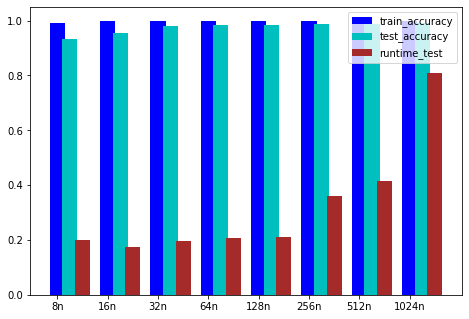

In [55]:
data = [train_accuracy, test_accuracy, runtime_test]
X = np.arange(8)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.3 , tick_label=["8n","16n","32n", "64n","128n","256n","512n","1024n"])
ax.bar(X + 0.25, data[1], color = 'c', width = 0.3)
ax.bar(X + 0.50, data[2], color = 'brown', width = 0.3)
ax.legend(labels=['train_accuracy', 'test_accuracy','runtime_test'])

In [58]:
print('Accuracy: %.2f' % (max(test_accuracy)*100))

Accuracy: 99.07


In [60]:
train_accuracy=[]
test_accuracy=[]
runtime_test=[]

for i in range(2,6):
  j=i
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())

  while(j!=0):
    model.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
    j-=1
    
  model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

  model.compile(optimizer ='adam' , loss = 'sparse_categorical_crossentropy' ,metrics =['accuracy'])
  model.fit(X_train , y_train , epochs = 100)

  val_loss_train, val_acc_train = model.evaluate(X_train, y_train)
  train_accuracy.append(val_acc_train)

  start_time = time.time()
  val_loss_test, val_acc_test = model.evaluate(X_test, y_test)
  test_accuracy.append(val_acc_test)
  runtime_test.append((time.time() - start_time))

Epoch 1/100
532/532 [==============================] - 1s 2ms/step - loss: 0.3954 - accuracy: 0.8832
Epoch 2/100
532/532 [==============================] - 1s 2ms/step - loss: 0.1454 - accuracy: 0.9564
Epoch 3/100
532/532 [==============================] - 1s 2ms/step - loss: 0.1053 - accuracy: 0.9682
Epoch 4/100
532/532 [==============================] - 1s 2ms/step - loss: 0.0813 - accuracy: 0.9752
Epoch 5/100
532/532 [==============================] - 1s 2ms/step - loss: 0.0690 - accuracy: 0.9781
Epoch 6/100
532/532 [==============================] - 1s 2ms/step - loss: 0.0556 - accuracy: 0.9823
Epoch 7/100
532/532 [==============================] - 1s 2ms/step - loss: 0.0449 - accuracy: 0.9865
Epoch 8/100
532/532 [==============================] - 1s 2ms/step - loss: 0.0395 - accuracy: 0.9880
Epoch 9/100
532/532 [==============================] - 1s 2ms/step - loss: 0.0355 - accuracy: 0.9884
Epoch 10/100
532/532 [==============================] - 1s 2ms/step - loss: 0.0314 - accura

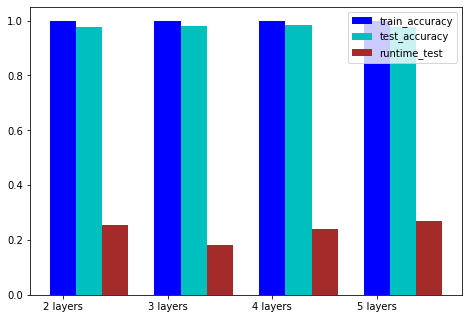

In [63]:
data = [train_accuracy, test_accuracy, runtime_test]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25,tick_label=["2 layers","3 layers","4 layers", "5 layers"])
ax.bar(X + 0.25, data[1], color = 'c', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'brown', width = 0.25)
ax.legend(labels=['train_accuracy', 'test_accuracy','runtime_test'])

In [64]:
print('Accuracy: %.2f' % (max(test_accuracy)*100))

Accuracy: 98.50
